<a href="https://colab.research.google.com/github/pipit20/Project-BK/blob/main/BK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BAB 1 - (J.62DMI00.004.1) Mengumpulkan data

In [ ]:
import pandas as pd # untuk memasukkan dataset ke dataframe
import seaborn as sns # untuk mempercantik visualisasi
import matplotlib.pyplot as plt # untuk menggambar grafik
from sklearn.model_selection import train_test_split # untuk membagi training dan testing
from sklearn.preprocessing import StandardScaler # untuk normalisasi
from sklearn.tree import DecisionTreeClassifier # kita pakai decision Tree
import numpy as np # digunakan untuk operasi matematika
from sklearn.pipeline import Pipeline #digunakan untuk mencegah nilai nya bocor
from sklearn.model_selection import GridSearchCV #digunakan untuk mendapatkan parameter optimal
# untuk melihat score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/crx.data')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/crx.data', header=None)

In [ ]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


### memasukkan nama fitur kedalam dataset

In [ ]:
# silakan diperbaiki jika diperlukan
dataset.columns=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','Class']

In [ ]:
dataset.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## BAB 2 – (J.62DMI00.005.1) Menelaah data

### analisis karakteristik data

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  Class   690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


### cek distribusi class

In [ ]:
dataset['Class'].value_counts()

Class
-    383
+    307
Name: count, dtype: int64

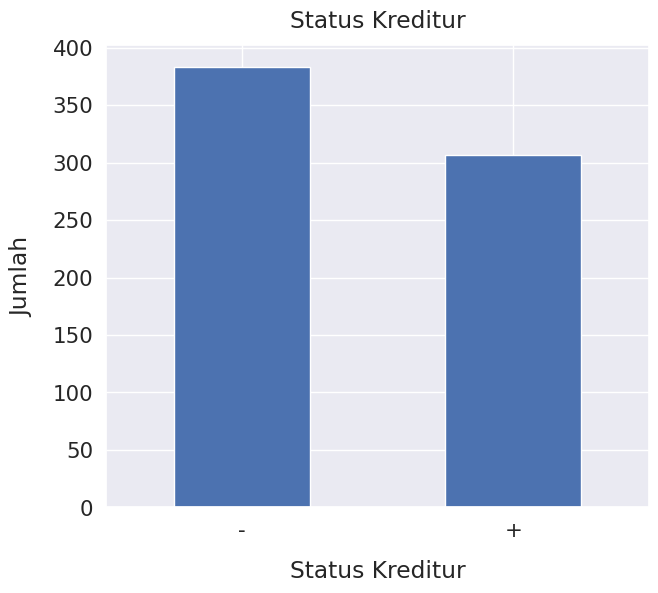

In [ ]:
sns.set(font_scale=1.4)
dataset['Class'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Status Kreditur", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Status Kreditur", y=1.02);

### cek ditribusi fitur lain terhadap class
anda diperbolehkan menggunakan code dibawah ini atau anda mengunakan coding anda sendiri (at your own risk)

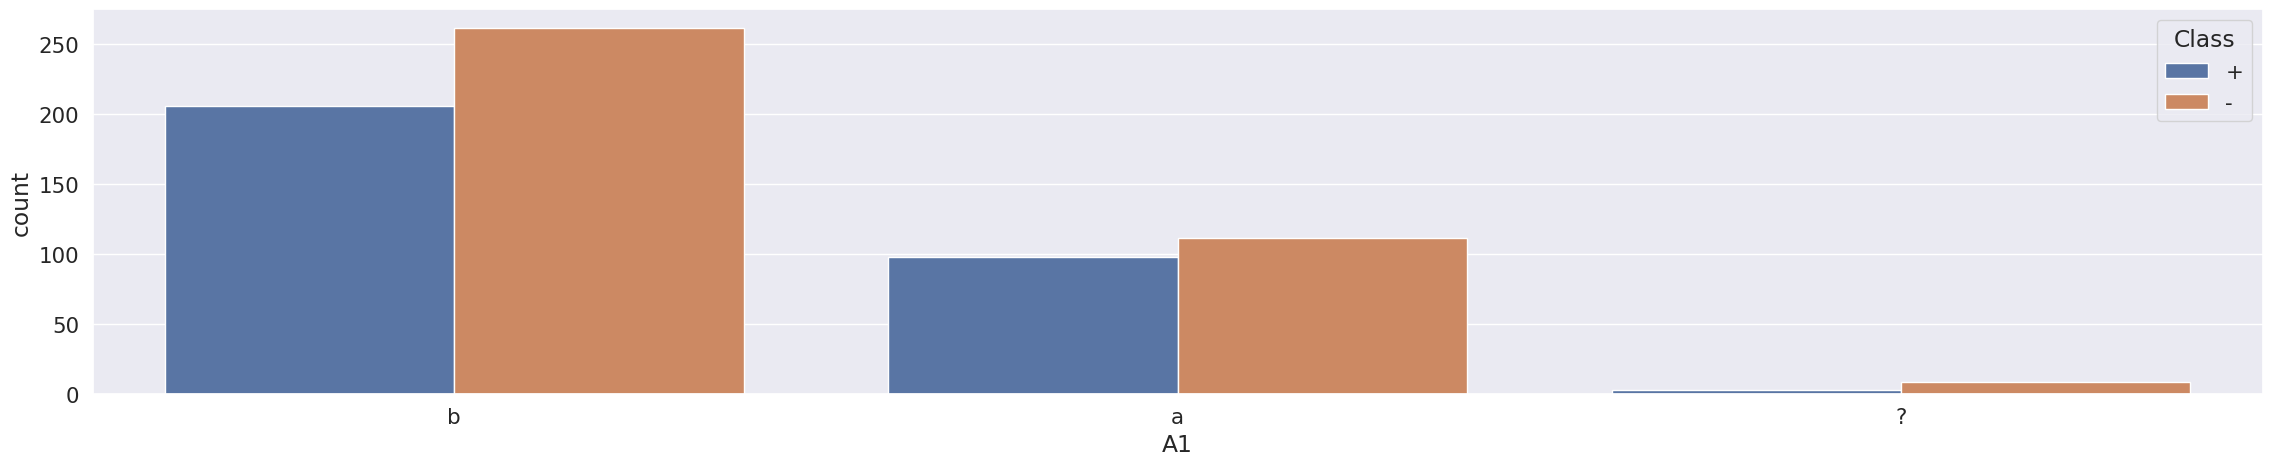

In [ ]:
plt.subplots(figsize = (28,5))
sns.countplot(x=dataset['A1'],order=dataset['A1'].value_counts().index,hue=dataset['Class'])
plt.show()

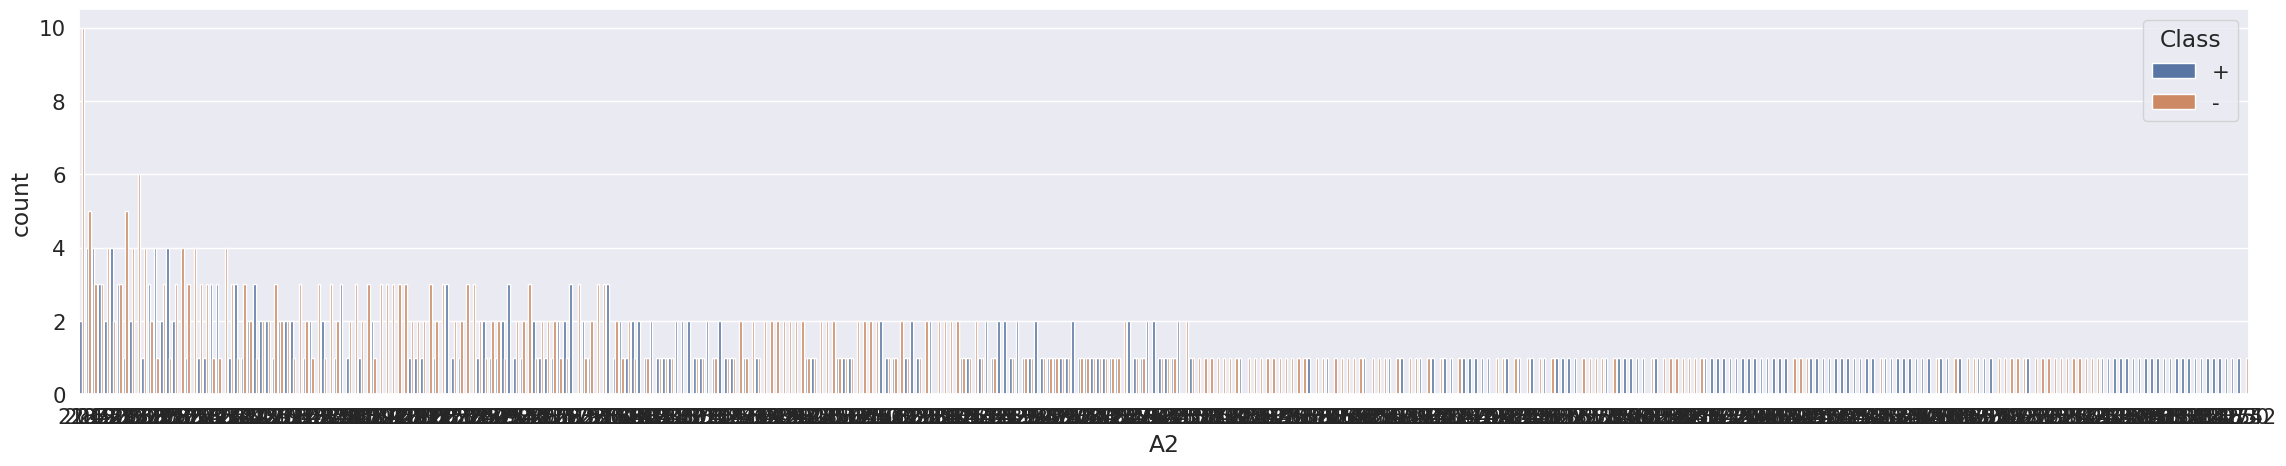

In [ ]:
plt.subplots(figsize = (28,5))
sns.countplot(x=dataset['A2'],order=dataset['A2'].value_counts().index,hue=dataset['Class'])
plt.show()


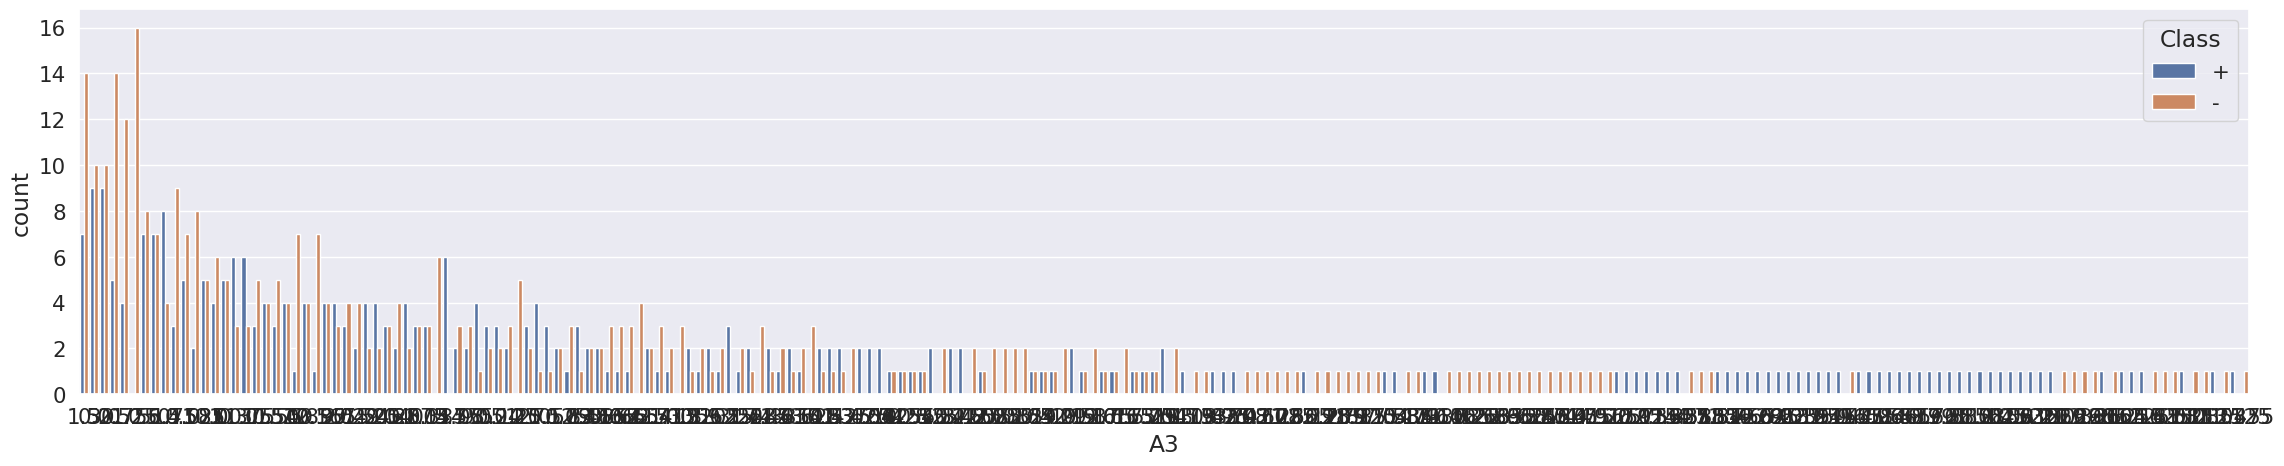

In [ ]:
plt.subplots(figsize = (28,5))
sns.countplot(x=dataset['A3'],order=dataset['A3'].value_counts().index,hue=dataset['Class'])
plt.show()


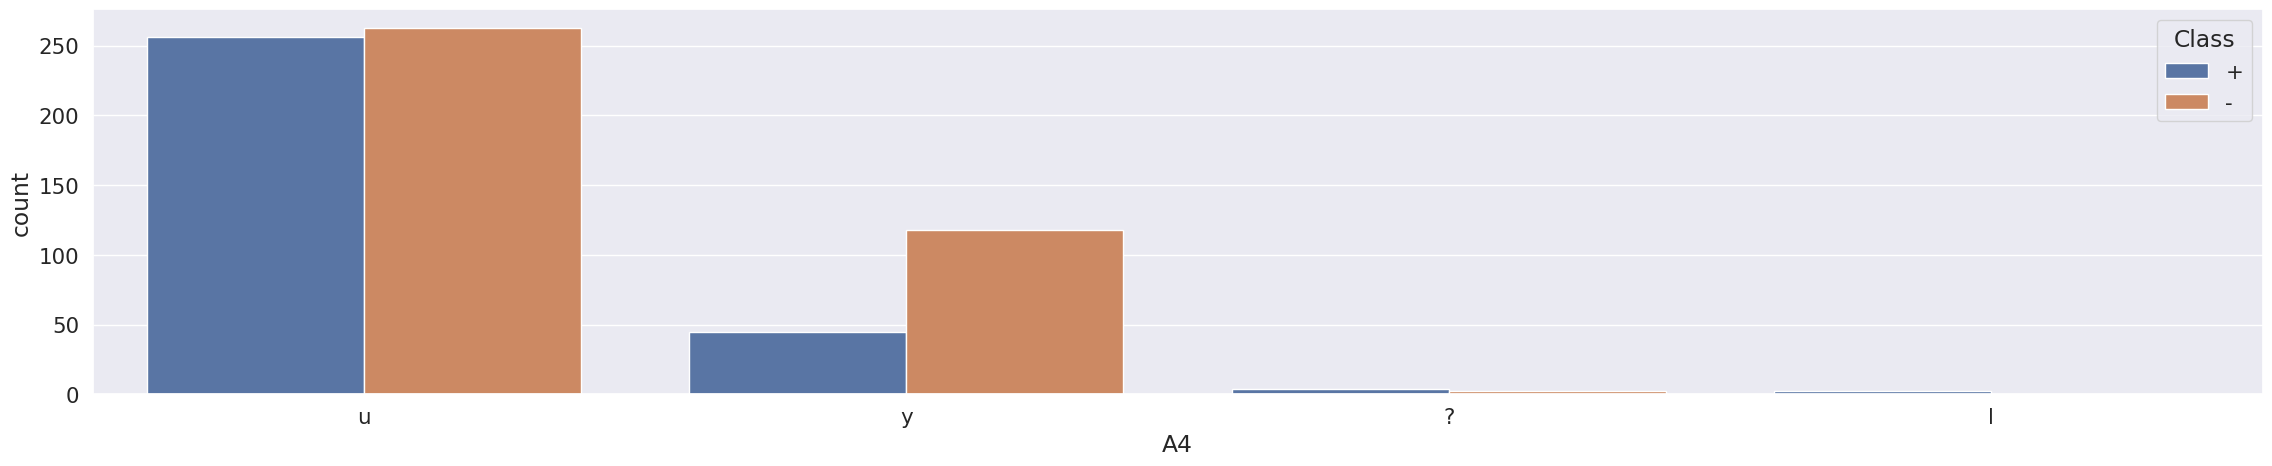

In [ ]:
plt.subplots(figsize = (28,5))
sns.countplot(x=dataset['A4'],order=dataset['A4'].value_counts().index,hue=dataset['Class'])
plt.show()


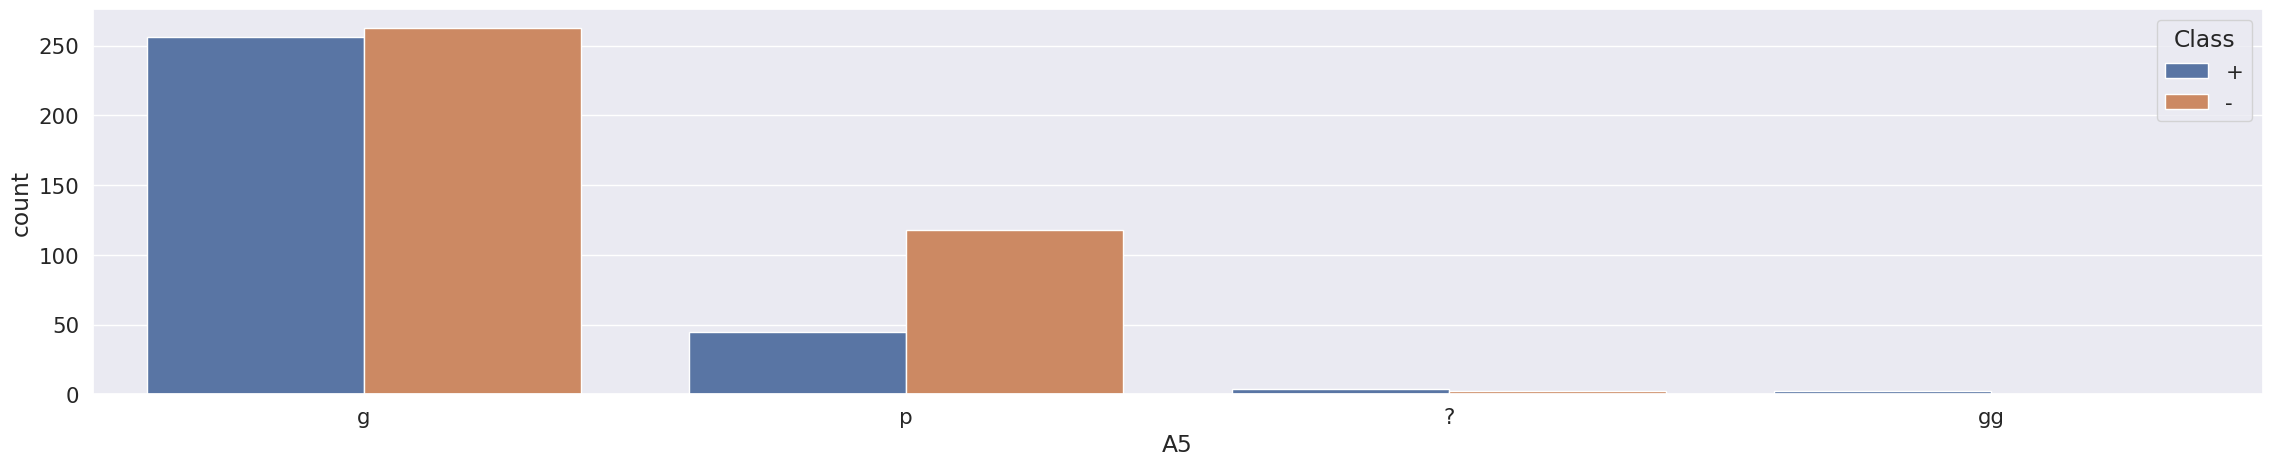

In [ ]:
plt.subplots(figsize = (28,5))
sns.countplot(x=dataset['A5'],order=dataset['A5'].value_counts().index,hue=dataset['Class'])
plt.show()


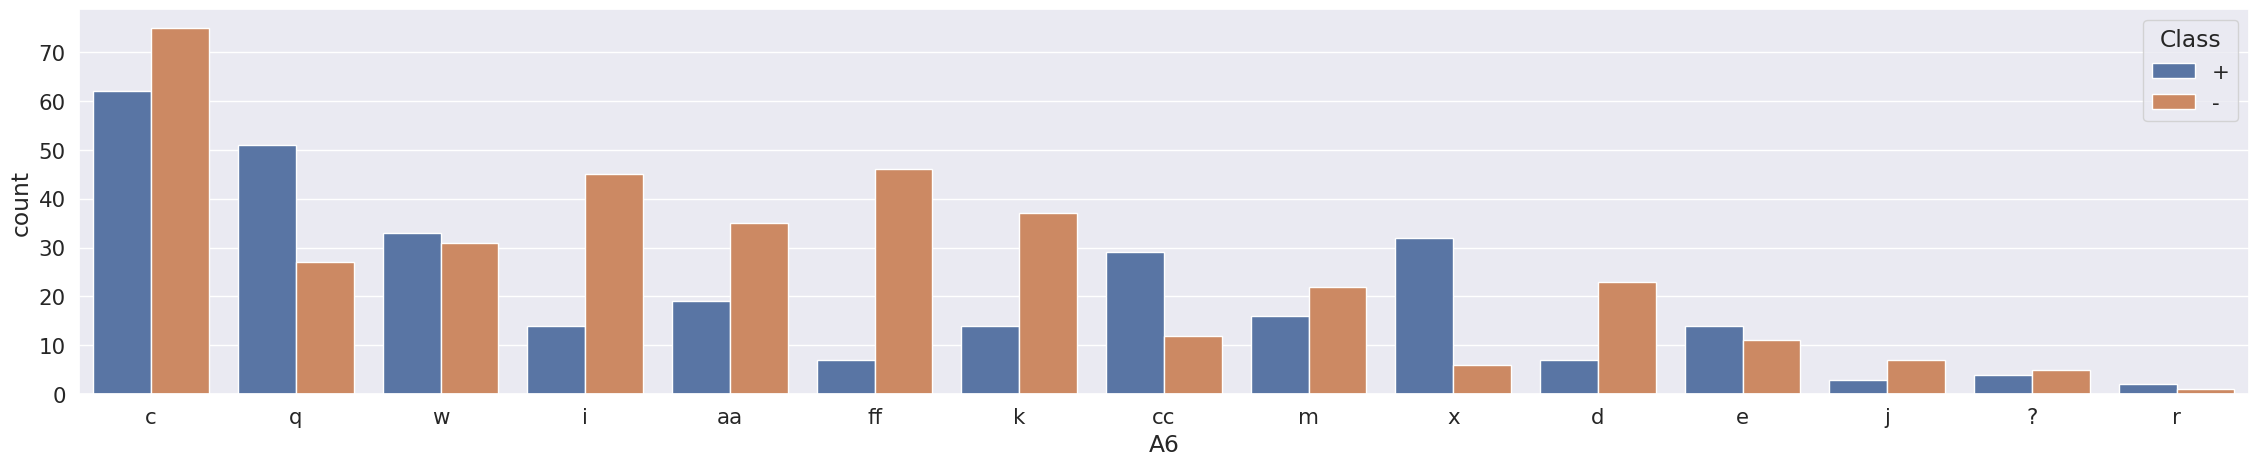

In [ ]:
plt.subplots(figsize = (28,5))
sns.countplot(x=dataset['A6'],order=dataset['A6'].value_counts().index,hue=dataset['Class'])
plt.show()


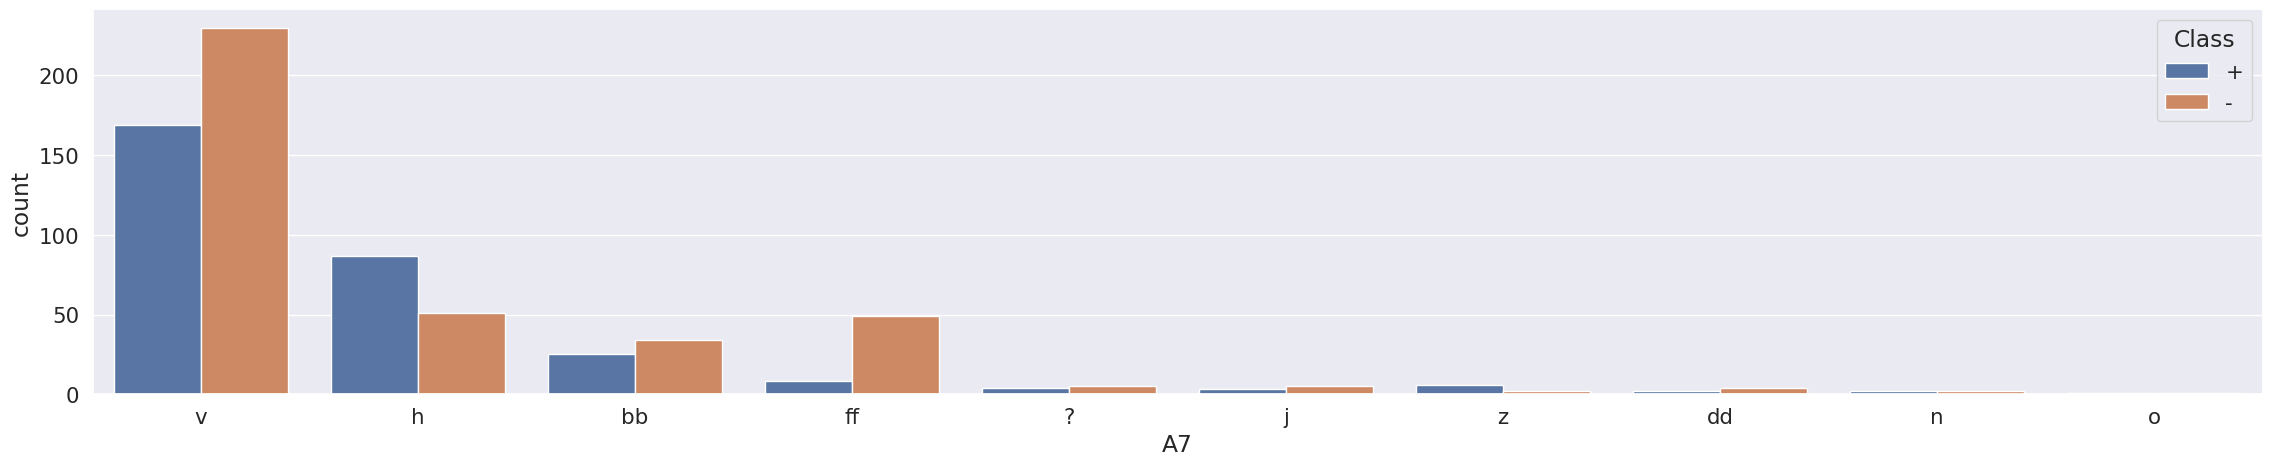

In [ ]:
plt.subplots(figsize = (28,5))
sns.countplot(x=dataset['A7'],order=dataset['A7'].value_counts().index,hue=dataset['Class'])
plt.show()


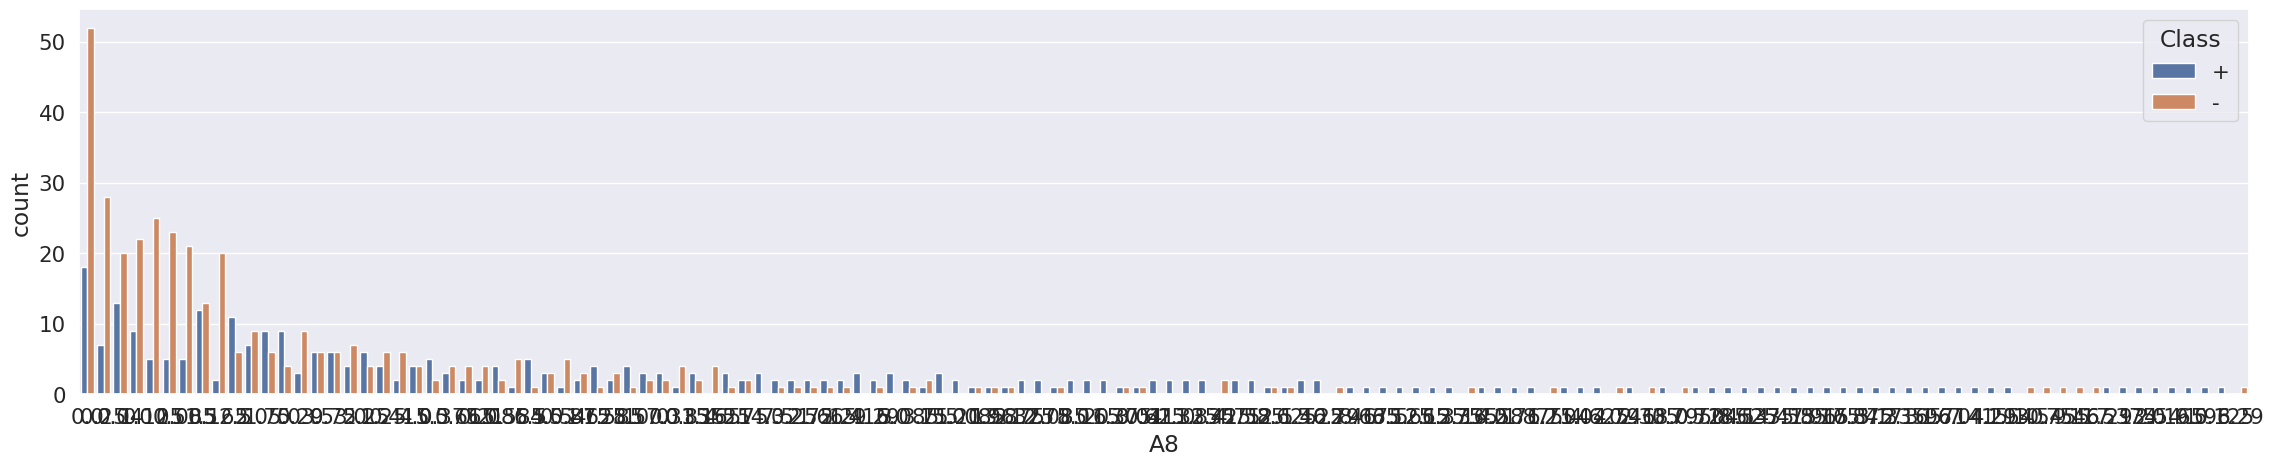

In [ ]:
plt.subplots(figsize = (28,5))
sns.countplot(x=dataset['A8'],order=dataset['A8'].value_counts().index,hue=dataset['Class'])
plt.show()


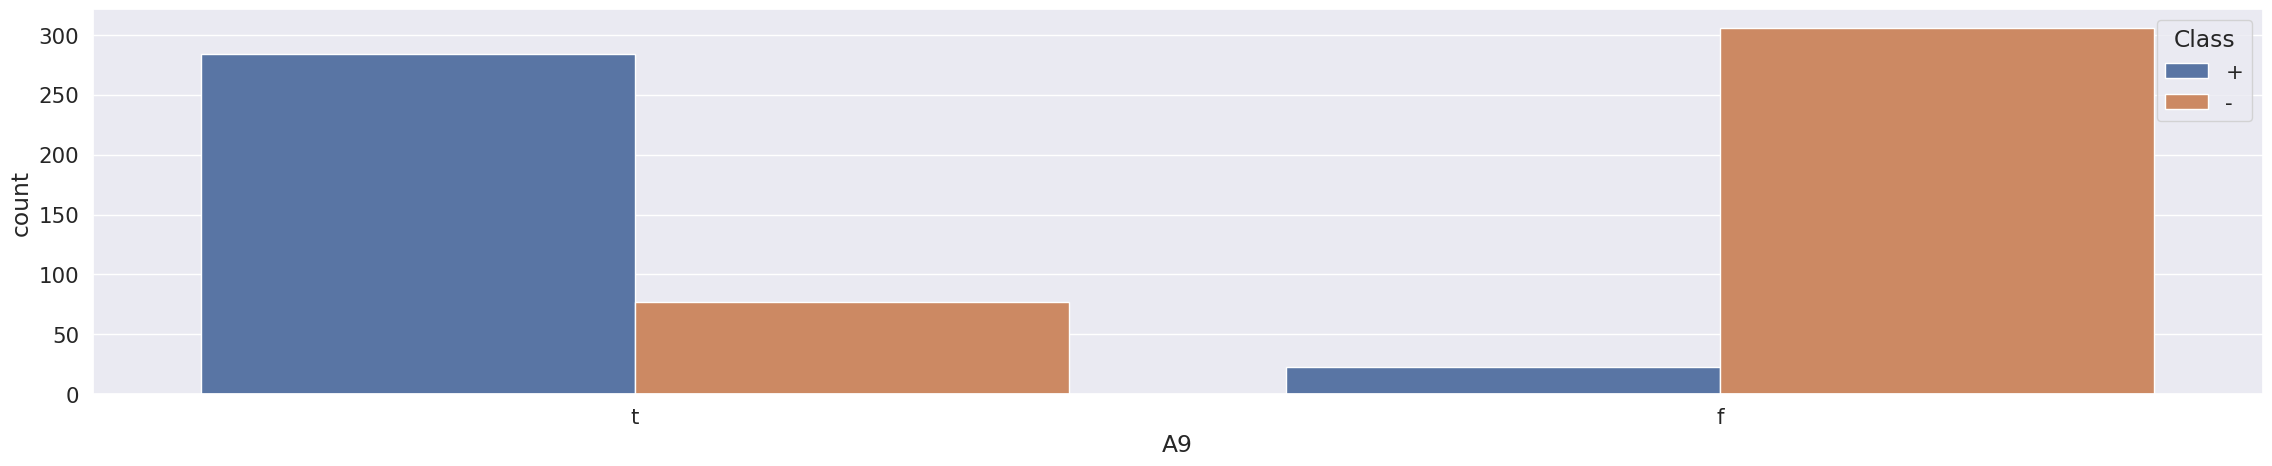

In [ ]:
plt.subplots(figsize = (28,5))
sns.countplot(x=dataset['A9'],order=dataset['A9'].value_counts().index,hue=dataset['Class'])
plt.show()


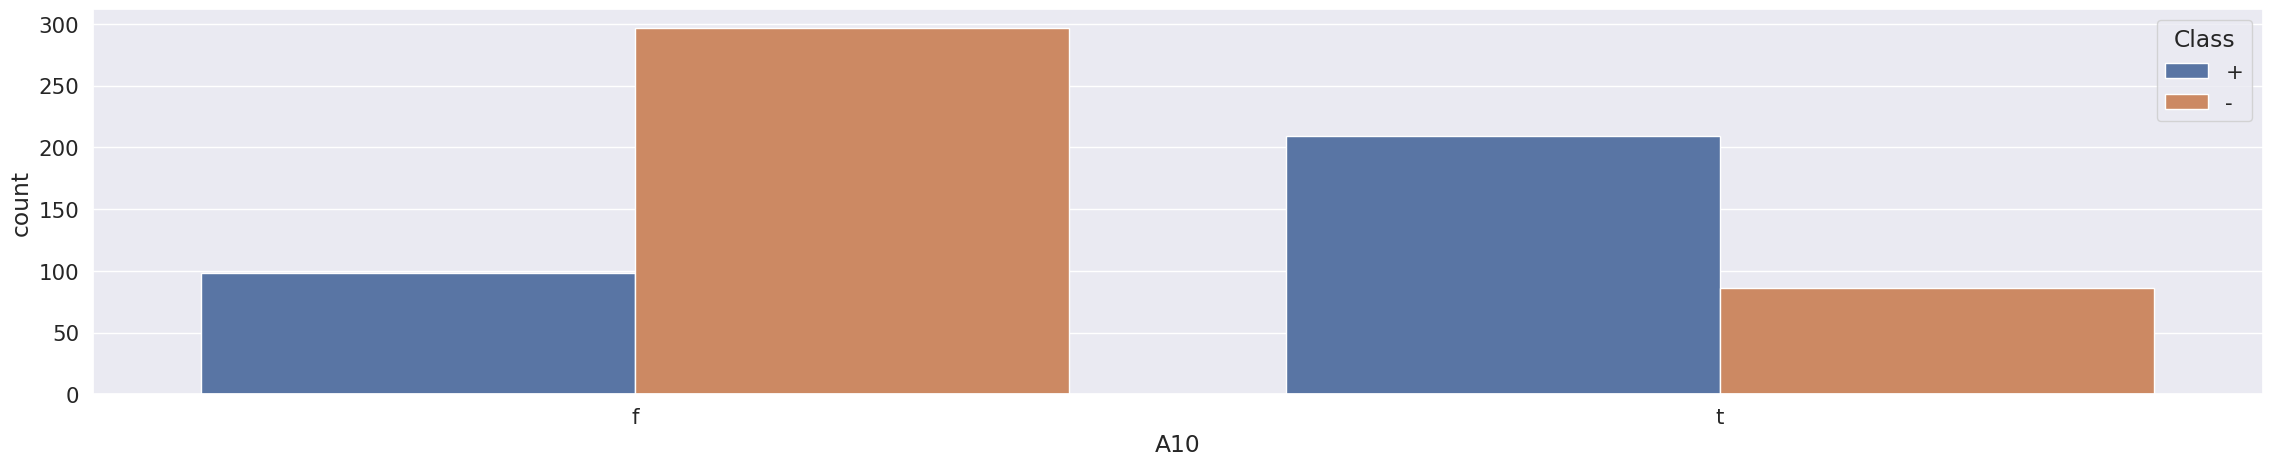

In [ ]:
plt.subplots(figsize = (28,5))
sns.countplot(x=dataset['A10'],order=dataset['A10'].value_counts().index,hue=dataset['Class'])
plt.show()


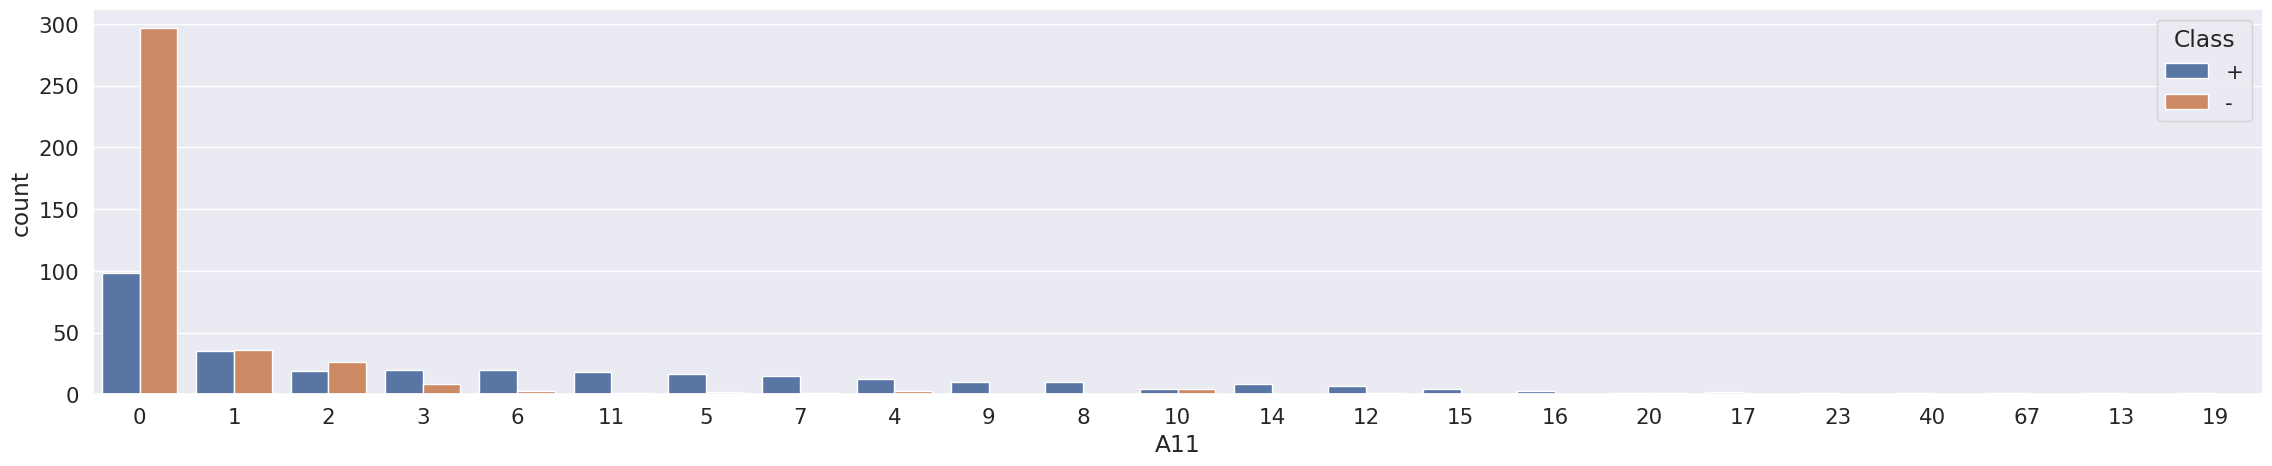

In [ ]:
plt.subplots(figsize = (28,5))
sns.countplot(x=dataset['A11'],order=dataset['A11'].value_counts().index,hue=dataset['Class'])
plt.show()


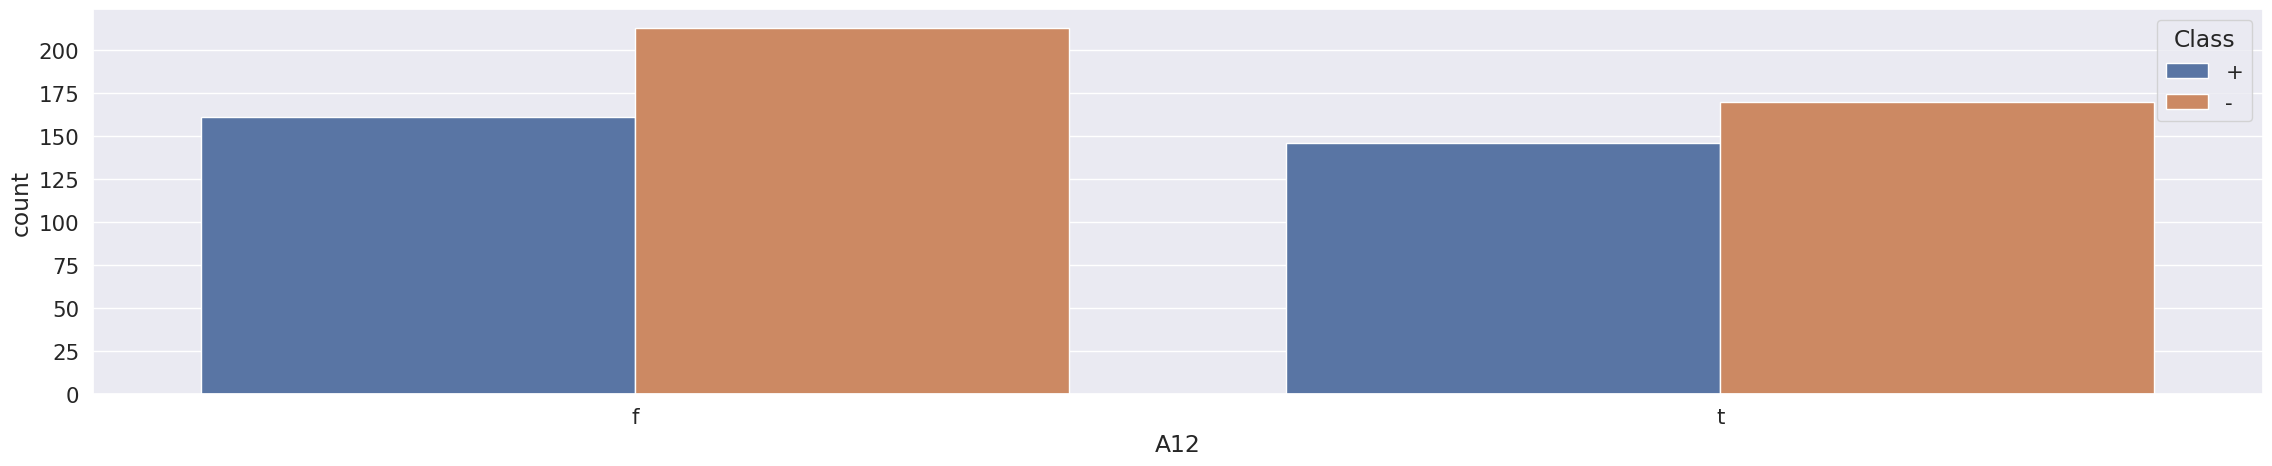

In [ ]:
plt.subplots(figsize = (28,5))
sns.countplot(x=dataset['A12'],order=dataset['A12'].value_counts().index,hue=dataset['Class'])
plt.show()


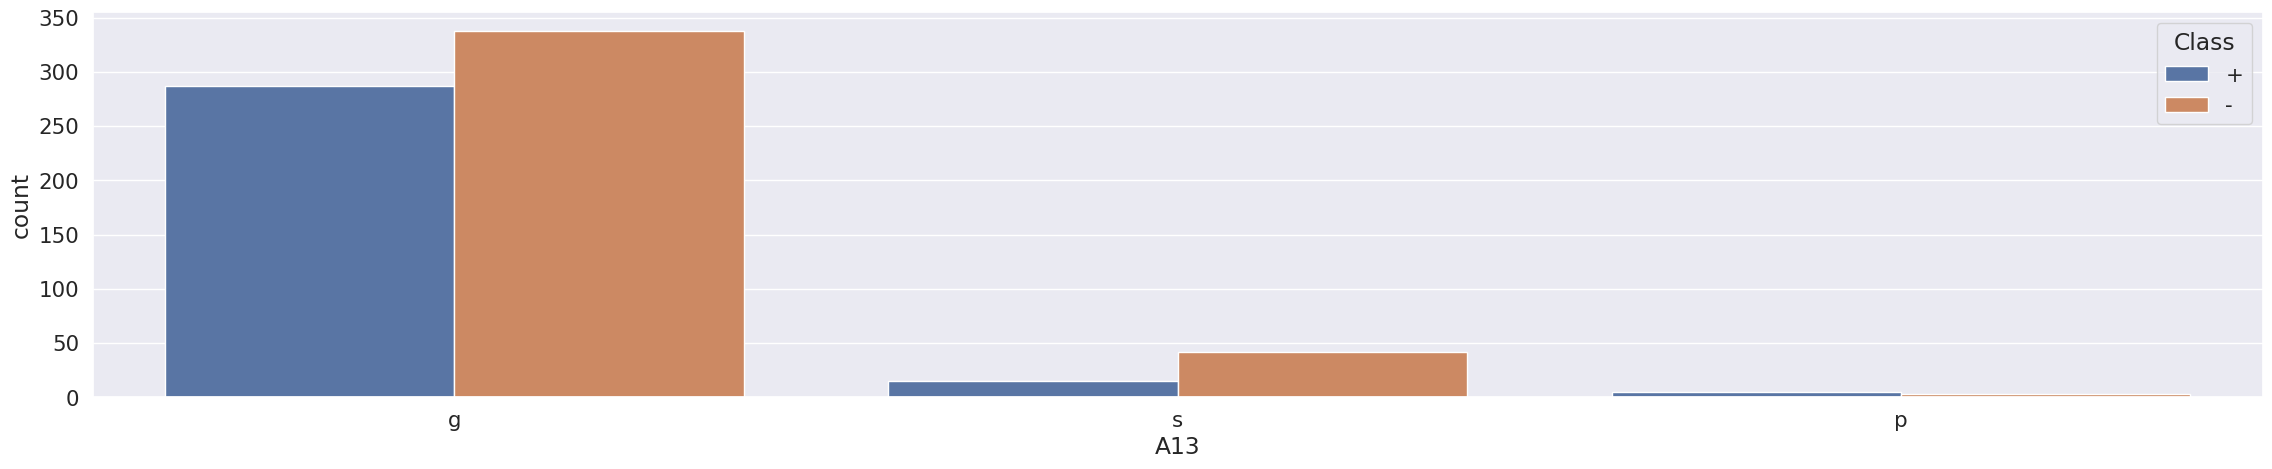

In [ ]:
plt.subplots(figsize = (28,5))
sns.countplot(x=dataset['A13'],order=dataset['A13'].value_counts().index,hue=dataset['Class'])
plt.show()


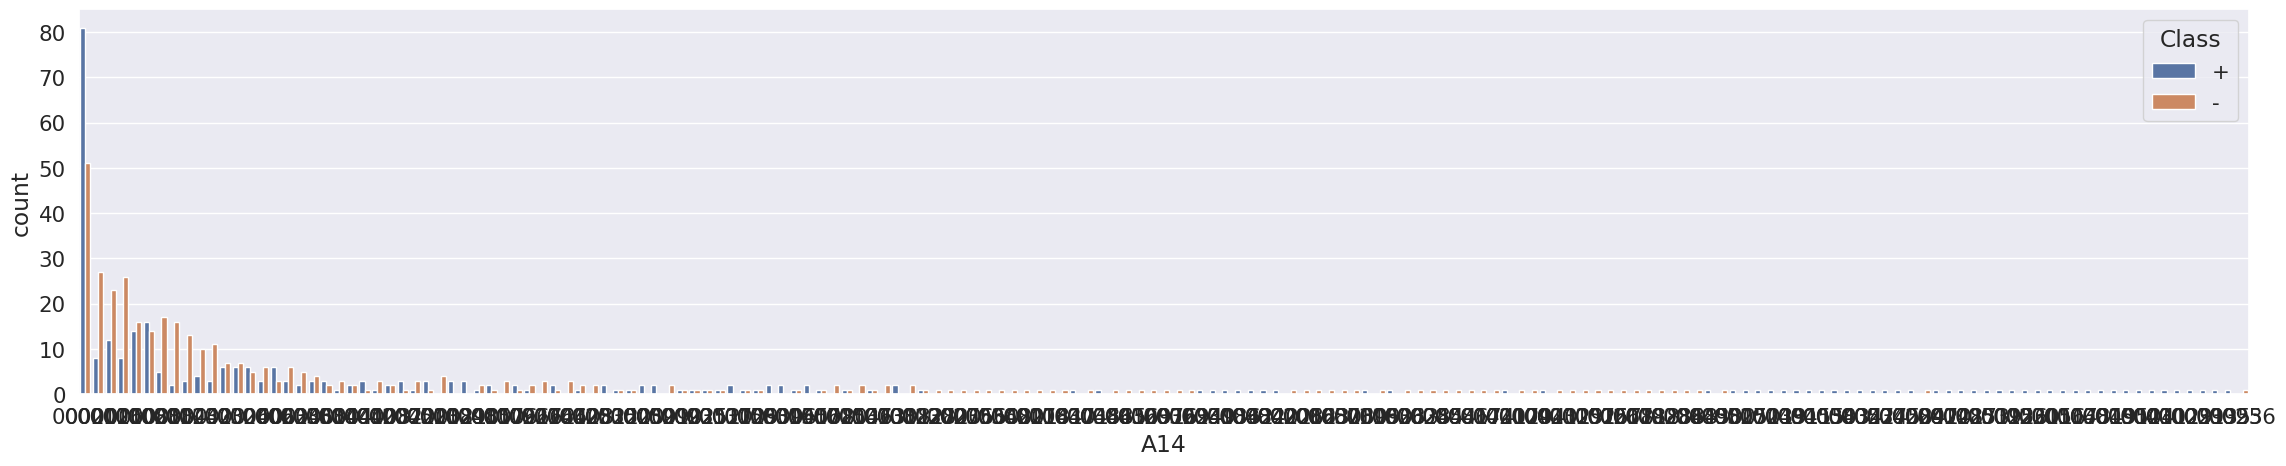

In [ ]:
plt.subplots(figsize = (28,5))
sns.countplot(x=dataset['A14'],order=dataset['A14'].value_counts().index,hue=dataset['Class'])
plt.show()


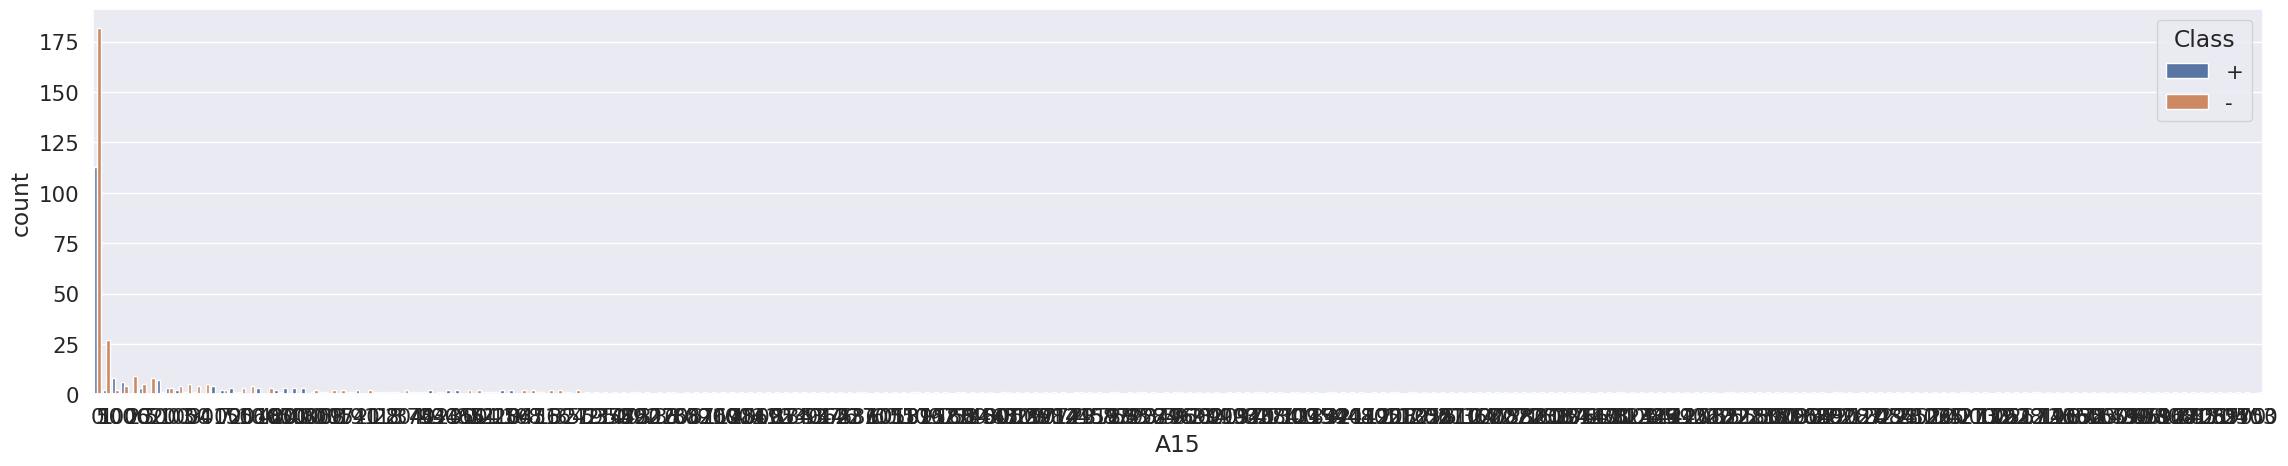

In [ ]:
plt.subplots(figsize = (28,5))
sns.countplot(x=dataset['A15'],order=dataset['A15'].value_counts().index,hue=dataset['Class'])
plt.show()


**tambahkan jika diperlukan**

## BAB 3 – (J.62DMI00.006.1) memvalidasi data

**temuan**:
- Penilaian kualitas data sesuai dengan tujuan teknis data science, dengan sajian sebagaimana hasil analisis karakteristik data
- Penilaian tingkat kecukupan data sesuai dengan tujuan teknis data science, dengan sajian sebagaimana hasil analisis karakteristik data
- ada beberapa fitur yang nilainya hilang, harus digunakan tahapan **`memperbaiki nilai yang hilang`**
- distribusi class **`balanced`**, sehingga disini asesi **tidak melakukan proses perbaikan imbalanced learning**

## BAB 4 – (J.62DMI00.007.1) menentukan object data

untuk target disini bernama: Class

## BAB 5 – (J.62DMI00.008.1) membersihkan data

### Pengecekan kolom atribut

digunakan untuk mengecek apakah diperlukan konversi **non-numerik** menjadi **numerik**


In [ ]:
categorical_col = []
for column in dataset.columns:
    if dataset[column].dtype == object and len(dataset[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {dataset[column].unique()}")
        print("====================================")

A1 : ['b' 'a' '?']
A4 : ['u' 'y' '?' 'l']
A5 : ['g' 'p' '?' 'gg']
A6 : ['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' '?']
A7 : ['v' 'h' 'bb' 'ff' 'j' 'z' '?' 'o' 'dd' 'n']
A9 : ['t' 'f']
A10 : ['t' 'f']
A12 : ['f' 't']
A13 : ['g' 's' 'p']
Class : ['+' '-']


### Rubah Atribut menjadi Numerik
anda boleh memperbaiki kode dibawah atau menggunakan coding anda sendiri (at your own risk)

In [ ]:
dataset.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [ ]:
rubah1 = {'b':1, 'a':0}
dataset['A1'] = dataset['A1'].map(rubah1)

rubah1 = {'l':2, 'u':1, 'y':0}
dataset['A4'] = dataset['A4'].map(rubah1)

rubah1 = {'g':2, 'p':1, 'gg':0}
dataset['A5'] = dataset['A5'].map(rubah1)

rubah1 = {'w':13, 'q':12, 'm':11 , 'r':10 , 'cc':9 ,'k':8 , 'c':7 , 'd':6 , 'x':5 , 'i':4 , 'e':3 , 'aa':2 , 'ff':1 , 'j':0 }
dataset['A6'] = dataset['A6'].map(rubah1)

rubah1 = {'v':7, 'h':6, 'bb':5 , 'ff':4 , 'jz':3 ,'o':2 , 'dd':1 , 'n':0 }
dataset['A7'] = dataset['A7'].map(rubah1)

rubah1 = {'t':1, 'f':0}
dataset['A9'] = dataset['A9'].map(rubah1)

rubah1 = {'t':1, 'f':0}
dataset['A10'] = dataset['A10'].map(rubah1)

rubah1 = {'f':1, 't':0}
dataset['A12'] = dataset['A12'].map(rubah1)

rubah1 = {'g':2, 's':1, 'p':0}
dataset['A13'] = dataset['A13'].map(rubah1)

rubah1 = {'+':1, '-':0}
dataset['Class'] = dataset['Class'].map(rubah1)



cek perubahan data

In [ ]:
dataset.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,1.0,30.83,0.000,1.0,2.0,13.0,7.0,1.25,1,1,1,1,2,00202,0,1
1,0.0,58.67,4.460,1.0,2.0,12.0,6.0,3.04,1,1,6,1,2,00043,560,1
2,0.0,24.50,0.500,1.0,2.0,12.0,6.0,1.50,1,0,0,1,2,00280,824,1
3,1.0,27.83,1.540,1.0,2.0,13.0,7.0,3.75,1,1,5,0,2,00100,3,1
4,1.0,20.17,5.625,1.0,2.0,13.0,7.0,1.71,1,0,0,1,1,00120,0,1


### Memperbaiki nilai yang hilang

nilai yang hilang, ditulis dalam bentuk ?, maka kita rubah menjadi NaN

In [ ]:
dataset.replace("?", np.nan, inplace= True)

In [ ]:
dataset.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,1.0,30.83,0.000,1.0,2.0,13.0,7.0,1.25,1,1,1,1,2,00202,0,1
1,0.0,58.67,4.460,1.0,2.0,12.0,6.0,3.04,1,1,6,1,2,00043,560,1
2,0.0,24.50,0.500,1.0,2.0,12.0,6.0,1.50,1,0,0,1,2,00280,824,1
3,1.0,27.83,1.540,1.0,2.0,13.0,7.0,3.75,1,1,5,0,2,00100,3,1
4,1.0,20.17,5.625,1.0,2.0,13.0,7.0,1.71,1,0,0,1,1,00120,0,1


gunakan library missingno

In [ ]:
import missingno

<Axes: >

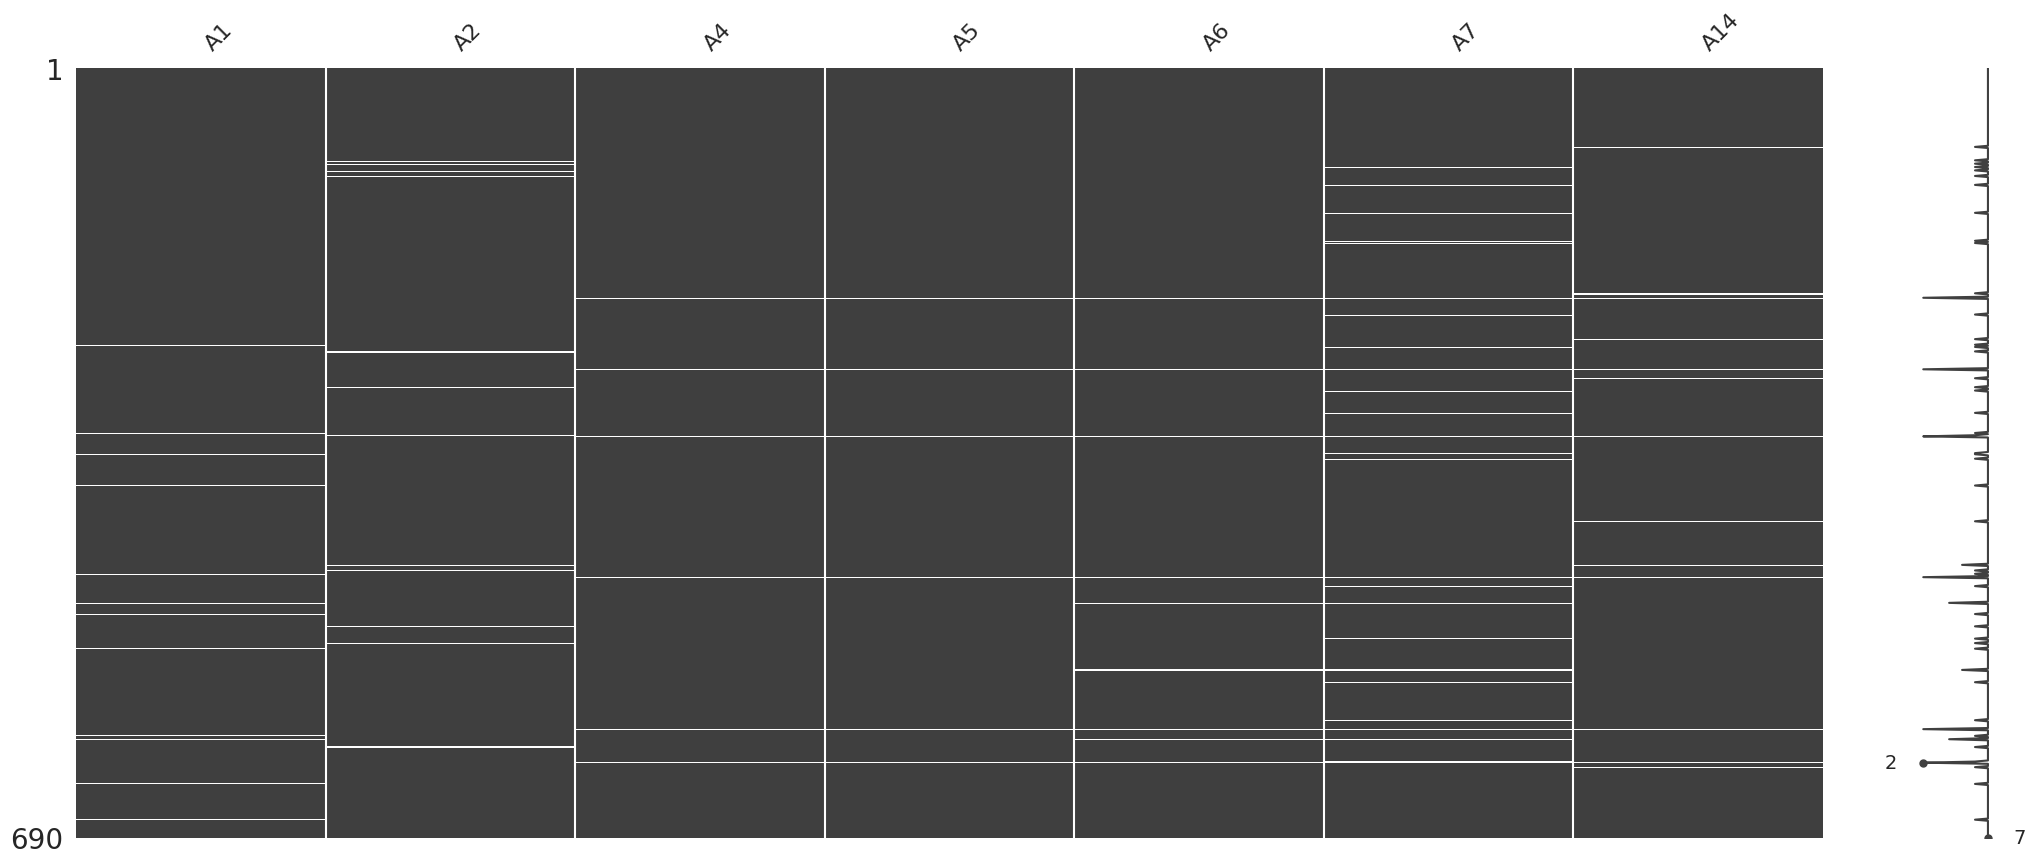

In [ ]:
missingdata_df = dataset.columns[dataset.isnull().any()].tolist()
missingno.matrix(dataset[missingdata_df])

In [ ]:
dataset.loc[:,list(dataset.loc[:,dataset.isnull().any()].columns)].isnull().sum()/(len(dataset))*100

A1     1.739130
A2     1.739130
A4     0.869565
A5     0.869565
A6     1.304348
A7     3.623188
A14    1.884058
dtype: float64

perbaiki fitur yang hilang. disini anda diperbolehkan menggunakan median, max, min

silakan tambahkan kode jika diperlukan

In [ ]:
median_value=dataset['A1'].median()
dataset['A1']=dataset['A1'].fillna(median_value)

median_value=dataset['A2'].median()
dataset['A2']=dataset['A2'].fillna(median_value)

median_value=dataset['A4'].median()
dataset['A4']=dataset['A4'].fillna(median_value)

median_value=dataset['A5'].median()
dataset['A5']=dataset['A5'].fillna(median_value)

median_value=dataset['A6'].median()
dataset['A6']=dataset['A6'].fillna(median_value)

median_value=dataset['A7'].median()
dataset['A7']=dataset['A7'].fillna(median_value)

median_value=dataset['A14'].median()
dataset['A14']=dataset['A14'].fillna(median_value)


In [ ]:
# untuk mengecek nilai sudah terisi semua
dataset.loc[:, dataset.isnull().any()].columns

Index([], dtype='object')

### cek apakah ada fitur yang bernilai sama

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    float64
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    float64
 4   A5      690 non-null    float64
 5   A6      690 non-null    float64
 6   A7      690 non-null    float64
 7   A8      690 non-null    float64
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  Class   690 non-null    int64  
dtypes: float64(7), int64(7), object(2)
memory usage: 86.4+ KB


In [ ]:
dataset = dataset.loc[:,dataset.apply(pd.Series.nunique) != 1]

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    float64
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    float64
 4   A5      690 non-null    float64
 5   A6      690 non-null    float64
 6   A7      690 non-null    float64
 7   A8      690 non-null    float64
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  Class   690 non-null    int64  
dtypes: float64(7), int64(7), object(2)
memory usage: 86.4+ KB


### cek apakah ada records yang duplikat

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    float64
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    float64
 4   A5      690 non-null    float64
 5   A6      690 non-null    float64
 6   A7      690 non-null    float64
 7   A8      690 non-null    float64
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  Class   690 non-null    int64  
dtypes: float64(7), int64(7), object(2)
memory usage: 86.4+ KB


In [ ]:
dataset = dataset.drop_duplicates()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    float64
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    float64
 4   A5      690 non-null    float64
 5   A6      690 non-null    float64
 6   A7      690 non-null    float64
 7   A8      690 non-null    float64
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  Class   690 non-null    int64  
dtypes: float64(7), int64(7), object(2)
memory usage: 86.4+ KB


### cek korelasi - hapus korelasi tingkat tinggi

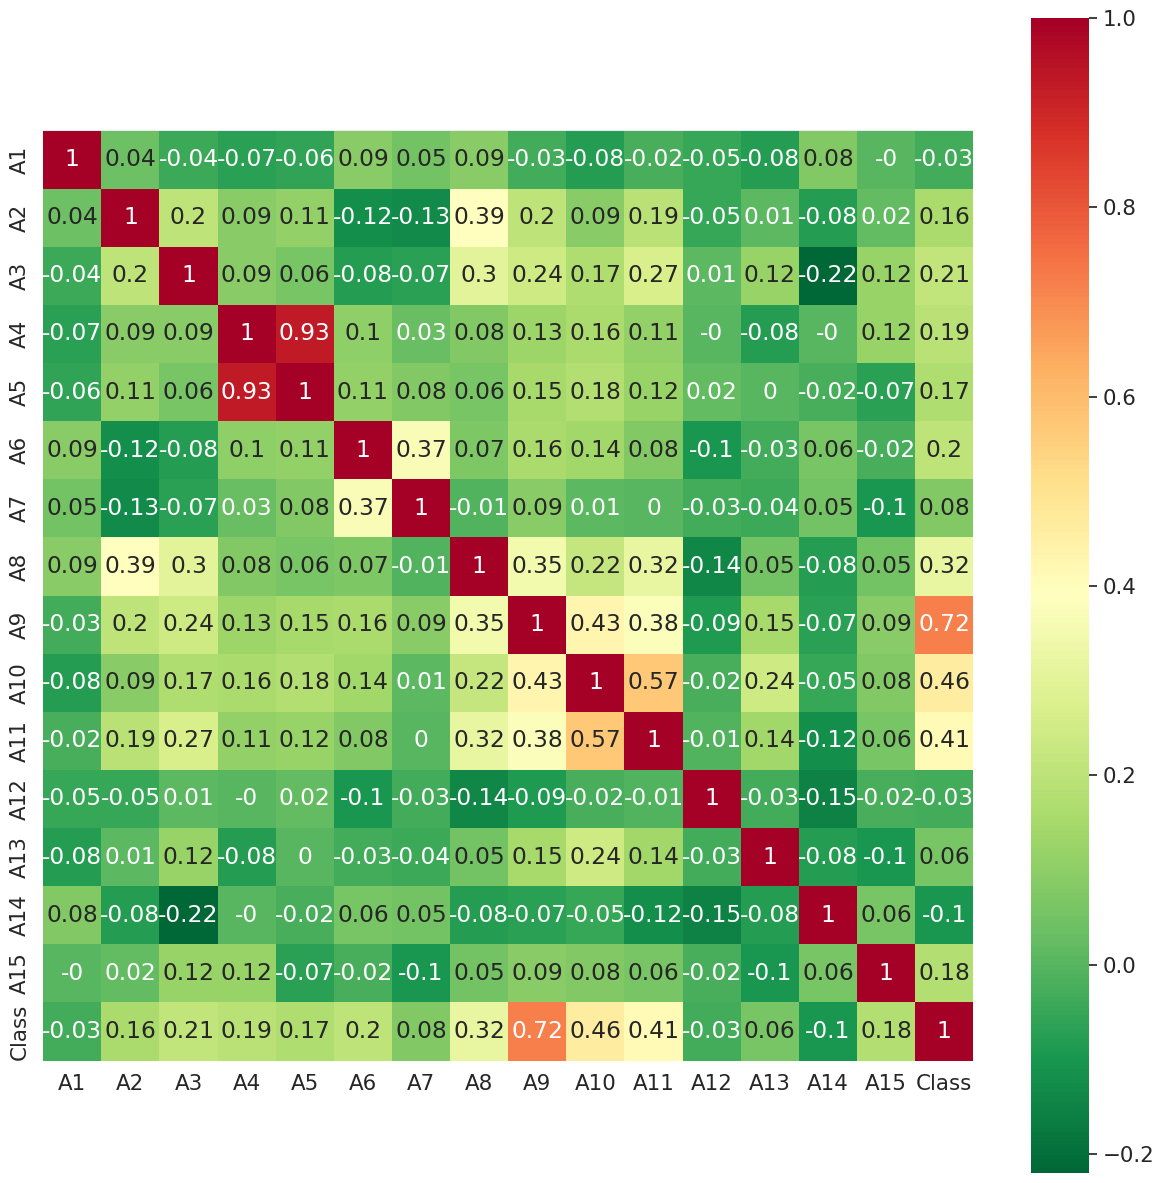

In [ ]:
# Correlation Heatmap
correlation = dataset.corr()
plt.subplots(figsize = (15,15))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

In [ ]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(dataset, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  1


In [ ]:
# removed correlated  features
dataset.drop(labels=corr_features, axis=1, inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    float64
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    float64
 4   A6      690 non-null    float64
 5   A7      690 non-null    float64
 6   A8      690 non-null    float64
 7   A9      690 non-null    int64  
 8   A10     690 non-null    int64  
 9   A11     690 non-null    int64  
 10  A12     690 non-null    int64  
 11  A13     690 non-null    int64  
 12  A14     690 non-null    object 
 13  A15     690 non-null    int64  
 14  Class   690 non-null    int64  
dtypes: float64(6), int64(7), object(2)
memory usage: 81.0+ KB


## BAB 6 – (J.62DMI00.009.1) mengkonstruksi data

In [ ]:
dataset.head()

,A1,A2,A3,A4,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,1.0,30.83,0.000,1.0,13.0,7.0,1.25,1,1,1,1,2,00202,0,1
1,0.0,58.67,4.460,1.0,12.0,6.0,3.04,1,1,6,1,2,00043,560,1
2,0.0,24.50,0.500,1.0,12.0,6.0,1.50,1,0,0,1,2,00280,824,1
3,1.0,27.83,1.540,1.0,13.0,7.0,3.75,1,1,5,0,2,00100,3,1
4,1.0,20.17,5.625,1.0,13.0,7.0,1.71,1,0,0,1,1,00120,0,1


silakan perbaiki data yang bertipe non numerik menjadi numerik atau **float**

In [ ]:
dataset['A2'] = dataset['A2'].astype(str).astype(float)
dataset['A14'] = dataset['A14'].astype(str).astype(float)
# tambahkan jika diperlukan


cek kembali

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    float64
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    float64
 4   A6      690 non-null    float64
 5   A7      690 non-null    float64
 6   A8      690 non-null    float64
 7   A9      690 non-null    int64  
 8   A10     690 non-null    int64  
 9   A11     690 non-null    int64  
 10  A12     690 non-null    int64  
 11  A13     690 non-null    int64  
 12  A14     690 non-null    float64
 13  A15     690 non-null    int64  
 14  Class   690 non-null    int64  
dtypes: float64(8), int64(7)
memory usage: 81.0 KB


## BAB 7 – (J.62DMI00.010.1) menentukan label data

In [ ]:
y = dataset['Class']

In [ ]:
X = dataset.drop(columns=['Class'])

### Perlakukan data original

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.1, random_state=42)

### Perlakuan data normal

In [ ]:
X_norm = StandardScaler().fit_transform(X)

In [ ]:
X_train_norm, X_test_norm, Y_train_norm, Y_test_norm = train_test_split(X_norm,y, test_size=0.1, random_state=42)

## BAB 8 – (J.62DMI00.013.1) membangun model

### menggunakan Decision Tree

In [ ]:
parameters_dt = {
                "model__max_depth": np.arange(1,21),
                "model__min_samples_leaf": np.arange(1,30,2),
                "model__min_samples_split": np.arange(2,11),
                "model__criterion": ['gini','entropy'],
                "model__random_state": [42]
}

In [ ]:
classifier_dt_pipeline = Pipeline([
                          ('model',DecisionTreeClassifier())
                          ])

#### Pemodelan data original

In [ ]:
ori_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [ ]:
ori_classifier_dt.fit(X_train,Y_train.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [42]})

In [ ]:
ori_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=4, min_samples_leaf=15,
                                        random_state=42))])

In [ ]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,ori_classifier_dt.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: 4
model__min_samples_leaf: 15
model__min_samples_split: 2
model__random_state: 42


#### Pemodelan data normal

In [ ]:
norm_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [ ]:
norm_classifier_dt.fit(X_train_norm,Y_train_norm.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [42]})

In [ ]:
norm_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=4, min_samples_leaf=15,
                                        random_state=42))])

In [ ]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,norm_classifier_dt.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: 4
model__min_samples_leaf: 15
model__min_samples_split: 2
model__random_state: 42


## BAB 9 – (J.62DMI00.014.1) mengevaluasi hasil pemodelan

### evaluasi data original

In [ ]:
ori_y_pred_dt_train = ori_classifier_dt.predict(X_train)

ori_accuracy_dt_train = accuracy_score(Y_train,ori_y_pred_dt_train)
print('Akurasi pada training set: ', ori_accuracy_dt_train)

ori_precision_dt_train = precision_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_precision_dt_train)

ori_recall_dt_train = recall_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_recall_dt_train)

ori_y_pred_dt_test = ori_classifier_dt.predict(X_test)

ori_accuracy_dt_test = accuracy_score(Y_test,ori_y_pred_dt_test)
print('Akurasi pada test set: ', ori_accuracy_dt_test)

ori_precision_dt_test = precision_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_precision_dt_test)

ori_recall_dt_test = recall_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_recall_dt_test)

Akurasi pada training set:  0.8760064412238325
Precision pada training set:  0.8760064412238325
Recall pada training set:  0.8760064412238325
Akurasi pada test set:  0.8405797101449275
Precision pada test set:  0.8405797101449275
Recall pada test set:  0.8405797101449275


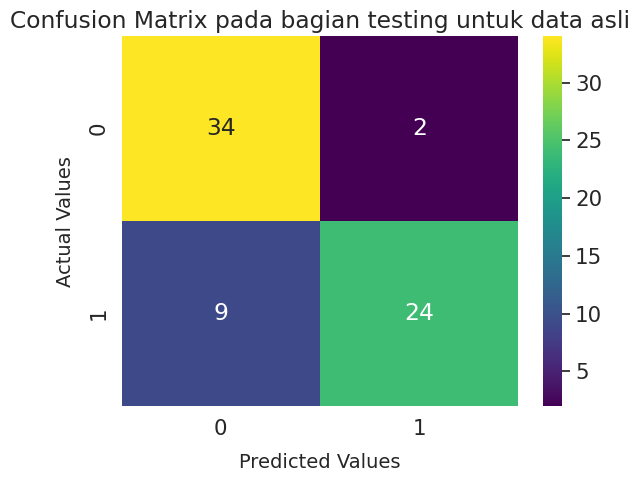

In [ ]:
sns.heatmap(confusion_matrix(Y_test,ori_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

### Evaluasi data normal

In [ ]:
norm_y_pred_dt_train = norm_classifier_dt.predict(X_train_norm)

norm_accuracy_dt_train = accuracy_score(Y_train_norm,norm_y_pred_dt_train)
print('Akurasi pada training set: ', norm_accuracy_dt_train)

norm_precision_dt_train = precision_score(Y_train_norm,norm_y_pred_dt_train, average='micro')
print('Precision pada training set: ', norm_precision_dt_train)

norm_recall_dt_train = recall_score(Y_train_norm,norm_y_pred_dt_train, average='micro')
print('Recall pada training set: ', norm_recall_dt_train)

norm_y_pred_dt_test = norm_classifier_dt.predict(X_test_norm)

norm_accuracy_dt_test = accuracy_score(Y_test_norm,norm_y_pred_dt_test)
print('Akurasi pada test set: ', norm_accuracy_dt_test)

norm_precision_dt_test = precision_score(Y_test_norm,norm_y_pred_dt_test, average='micro')
print('Precision pada test set: ', norm_precision_dt_test)

norm_recall_dt_test = recall_score(Y_test_norm,norm_y_pred_dt_test, average='micro')
print('Recall pada test set: ', norm_recall_dt_test)

Akurasi pada training set:  0.8760064412238325
Precision pada training set:  0.8760064412238325
Recall pada training set:  0.8760064412238325
Akurasi pada test set:  0.8405797101449275
Precision pada test set:  0.8405797101449275
Recall pada test set:  0.8405797101449275


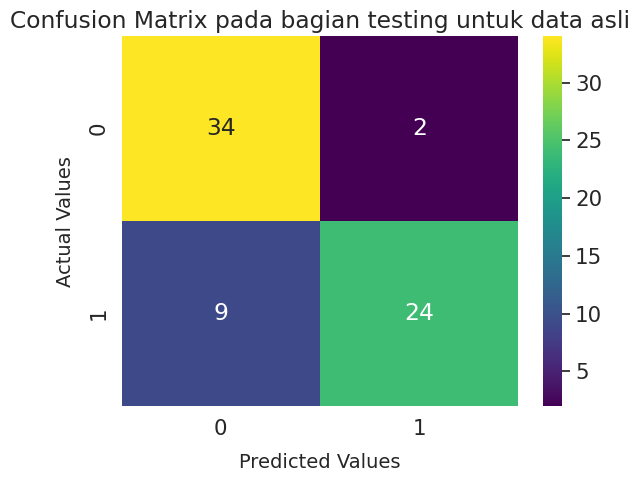

In [ ]:
sns.heatmap(confusion_matrix(Y_test_norm,norm_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

### pelaporan evaluasi

In [ ]:
models = [
          ('Machine Learning Data Original', ori_accuracy_dt_train, ori_accuracy_dt_test),
          ('Machine Learning Data Normalisasi', norm_accuracy_dt_train, norm_accuracy_dt_test)
         ]

In [ ]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Machine Learning Data Original,0.876006,0.84058
1,Machine Learning Data Normalisasi,0.876006,0.84058


In [ ]:
models_comparison = [
                        ('Machine Learning Data Original', ori_accuracy_dt_test, ori_recall_dt_test, ori_precision_dt_test),
                        ('Machine Learning Data Normalisasi', norm_accuracy_dt_test, norm_recall_dt_test, norm_precision_dt_test)
                    ]

In [ ]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Machine Learning Data Original,0.84058,0.84058,0.84058
1,Machine Learning Data Normalisasi,0.84058,0.84058,0.84058


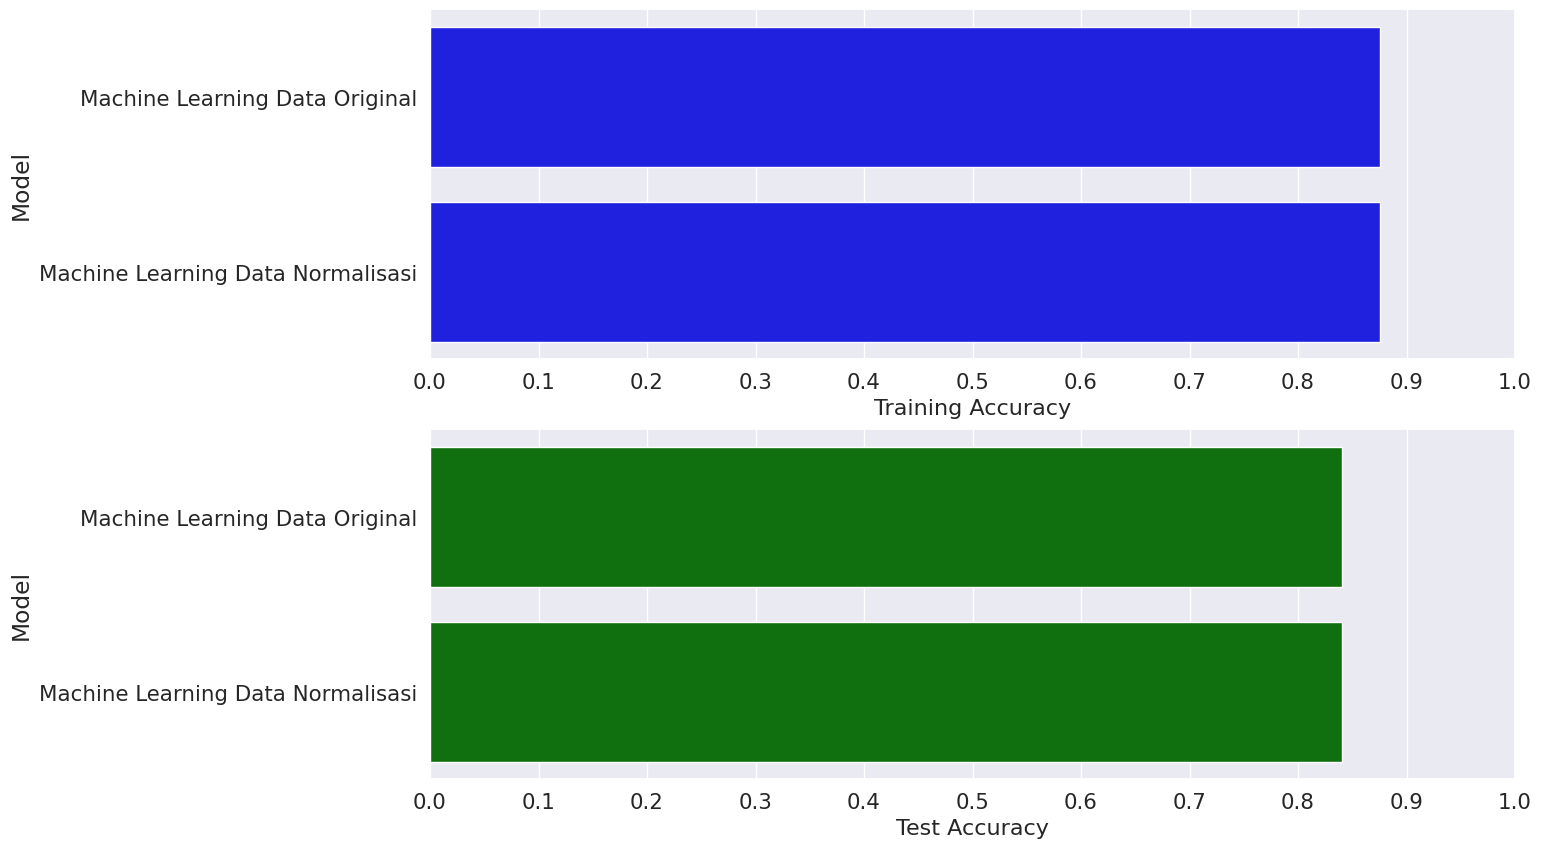

In [ ]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, color='blue', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, color='green', ax = axes[1], hue=None)
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

### pelaporan fitur terbaik

In [ ]:
from sklearn import tree

In [ ]:
def Analize_Feature(model,X_test):
    aux_dic = {'name':[],'coef':[]}
    pd.set_option('display.max_rows',len(X_test.columns))
    for name, importance in zip(X_test.columns,model.best_estimator_.named_steps["model"].feature_importances_):
        aux_dic['name'].append(name)
        aux_dic['coef'].append(importance)
        df_features_importance = pd.DataFrame(aux_dic)
    return df_features_importance.sort_values(by='coef',ascending=False)


In [ ]:
Analize_Feature(ori_classifier_dt,X_test)

,name,coef
7,A9,0.812390
9,A11,0.086216
13,A15,0.044746
12,A14,0.024013
2,A3,0.017077
6,A8,0.013731
4,A6,0.001828
0,A1,0.000000
1,A2,0.000000
3,A4,0.000000


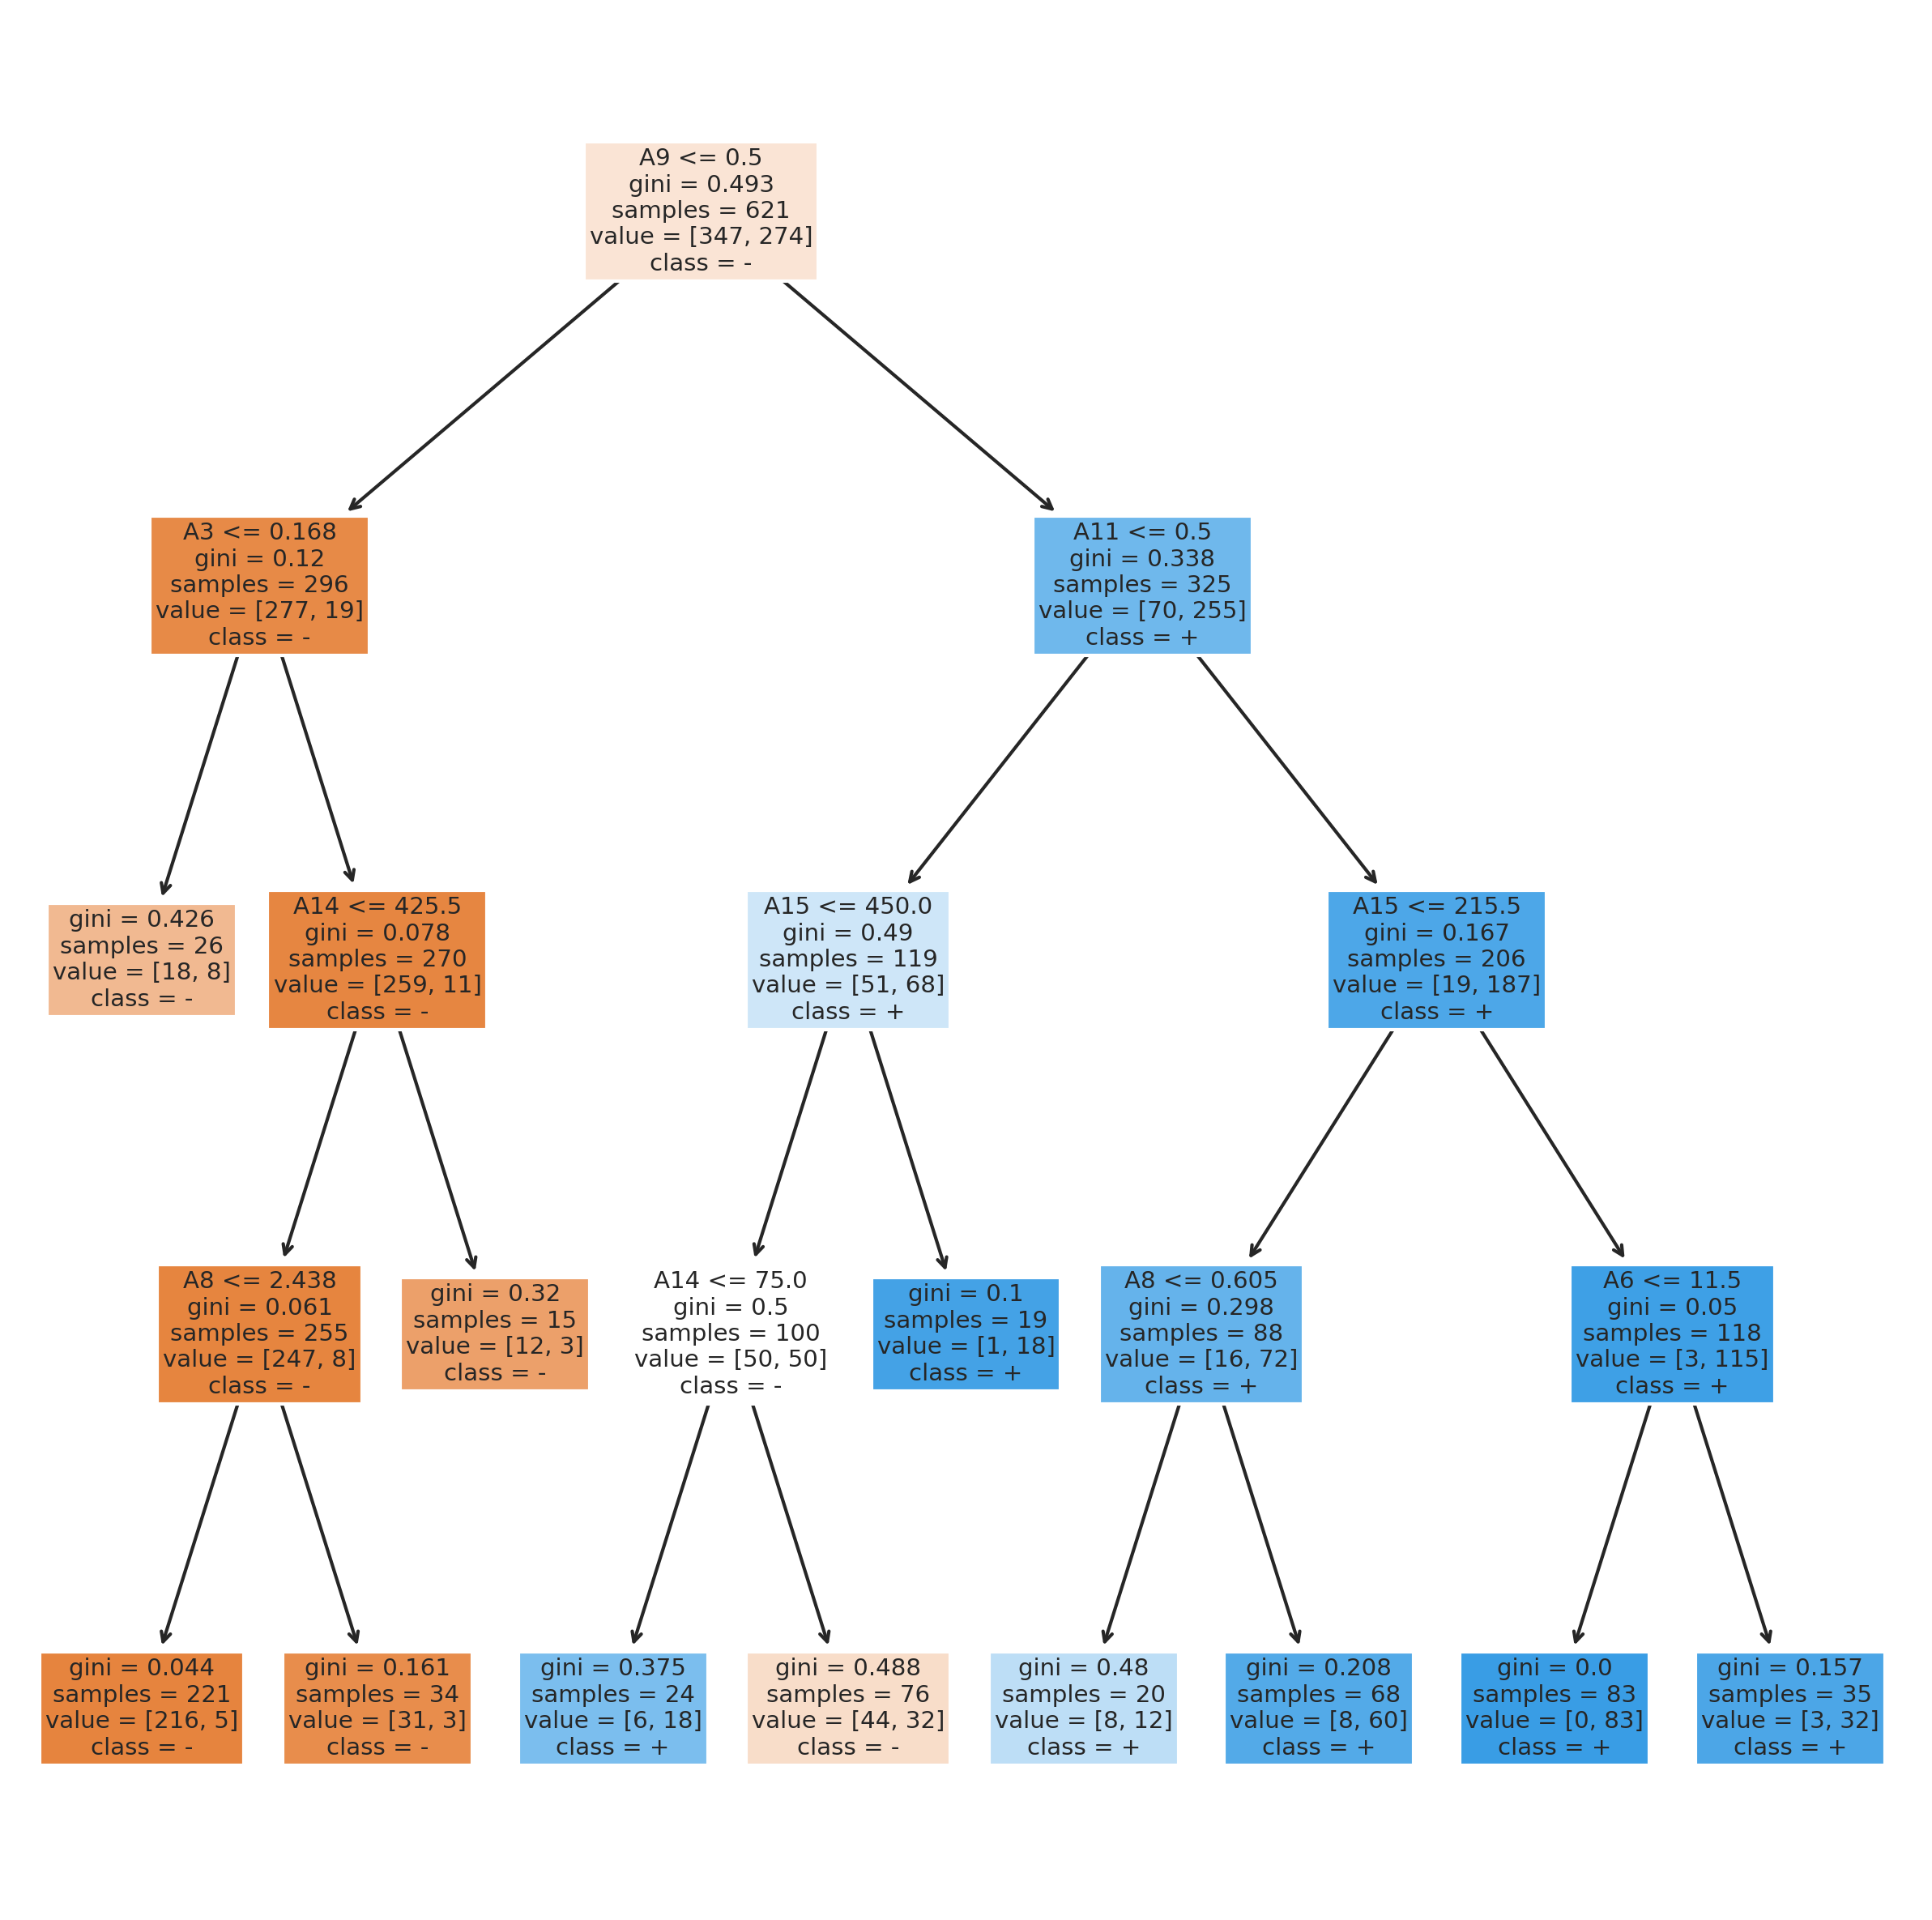

In [ ]:
# untuk memasukkan fn, perhatikan fitur yang tersedia di hasil Analize_Feature
fn=dataset.columns
cn=['-', '+']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(ori_classifier_dt.best_estimator_.named_steps["model"],
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('/content/drive/My Drive/Colab Notebooks/hasil_tree_ads.png')